## 1 Introducão

O Brasil e o mundo possuem um serio problema com os acidentes de transito (https://www.paho.org/bra/index.php?option=com_content&view=article&id=5147:acidentes-de-transito-folha-informativa&Itemid=779), sengundo a OPAS (Organização Pan-Americana da Saúde)

- Cerca de 1,35 milhão de pessoas morrem a cada ano em decorrência de acidentes no trânsito;
- Os acidentes de trânsito custam à maioria dos países 3% de seu produto interno bruto (PIB);
- Mais da metade de todas as mortes no trânsito ocorre entre usuários vulneráveis das vias: pedestres, ciclistas e motociclistas;
- 93% das mortes no trânsito ocorrem em países de baixa e média renda, embora estes concentrem aproximadamente 60% dos veículos do mundo;

Nesse artigo eu utilizei o banco de dados de acidente da policia rodoviaria federal em https://portal.prf.gov.br/dados-abetos-dicionario-acidentes, para buscar correlaćoes entre as causas de acidentes e o numero de mortes e assim fazer uma comparacao quais são os tipos de acidentes mais letais no transito brasileiro. Para a analise utilizar o metodo estatistico de MCA (multiple correspondence analysis).


## 2 Objetivos


- Correlacionar as causas de acidente com a tabela de classificacao utilizando MCA(multiple correspondence analysis)



## 3 Metodologia

A classificaćão do nivel de perigo de cada tipo de acidente sera feita analisando a frequencia de ocorrencias de vitimas feridas e mortas de cada acidente, para assim calcular a probabilidade de que tal acidente gere vitimas feridas ou mortas e de acordo com essa probabilidade sera atribuido um atibuto com o level de perigosidade desse tipo de acidente.

Depois sera feito a correlacão entre as causas dos acidentes, que é diferente do atributo tipo com esses dados calculados utilizando MCA(multiple correspondence analysis)

### 3.1 Correlation analysis

A análise de correlação é um método de avaliação estatística usado para estudar a força de um relacionamento entre duas variáveis contínuas medidas numericamente.[​1] https://www.djsresearch.co.uk/glossary/item/correlation-analysis-market-research

A correlação é medida por um número entre -1 e 1, se o número for de 0 a 1, significa que essas duas variáveis que medimos são correlacionadas positivas e quanto maior o número, maior a correlação. Se o número for menor que 0, isso significa que duas variáveis estão correlacionadas negativamente e quanto menor o número, mais forte será a correlação.

Esse método pode ser muito útil para medirmos a correlação entre os acidentes e as pessoas feridas.

### 3.2 MCA(multiple correspondence analysis)

A análise de correspondência múltipla (MCA) é um método estatístico. É aplicado a tabelas geralmente grandes que apresentam um conjunto de características "qualitativas" para uma população de indivíduos estatísticos (ou seja, indivíduos "biológicos", mas também em certos casos, instituições, países, grupos etc.). Extrai o que é considerado a informação estruturante mais importante dessas tabelas. [3​] https://www.politika.io/en/notice/multiple-correspondence-analysis

## 4 Dataset e limpeza de dados

Com a limpeza dos dados o nosso dadaset está com os seguintes valores:



| **Dados** | **Significado** |
|-----|-------------|
 id |  Variável com valores numéricos, representando o identificador do acidente.|
data_inversa | Data da ocorrência no formato dd/mm/aaaa.
dia_semana | Dia da semana da ocorrência. Ex.: Segunda, Terça, etc.
horario | Horário da ocorrência no formato hh:mm:ss.
uf | Unidade da Federação. Ex.: MG, PE, DF, etc.
municipio | Nome do município de ocorrência do acidente
causa_acidente | Identificação da causa principal do acidente. Neste conjunto de dados são excluídos os acidentes com a variável causa principal igual a “Não”.
tipo_acidente | Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista, etc. Neste conjunto de dados são excluídos os tipos de acidentes com ordem maior ou igual a dois. A ordem do acidente demonstra a sequência cronológica dos tipos presentes na mesma ocorrência.
classificação_acidente | Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado.
fase_dia | Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc.
sentido_via | Sentido da via considerando o ponto de colisão: Crescente e decrescente. 
condição_meteorologica | Condição meteorológica no momento do acidente: Céu claro, chuva, vento, etc.
tipo_pista |  Tipo da pista considerando a quantidade de faixas: Dupla, simples ou múltipla.
uso_solo | Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.



In [25]:
library("FactoMineR")
library("factoextra")
library(ggplot2)
library(ggdark)

df = read.table("datatran_2019.csv",sep=";",encoding='latin1', header = TRUE)

df.util = df[c(2:4,8:16)]


dark = dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14) + 

theme(plot.title = element_text(family = "Fira Sans Condensed"),
        plot.background = element_rect(fill = "grey10"),
        panel.background = element_blank(),
        panel.grid.major = element_line(color = "grey30", size = 0.2),
        panel.grid.minor = element_line(color = "grey30", size = 0.2),
        legend.background = element_blank(),
        axis.ticks = element_blank(),
        legend.key = element_blank(),
        legend.position = c(0.815, 0.27))

str(df.util$causa_acidente)
summary(df.util$tipo_acidente)

 Factor w/ 24 levels "Agressão Externa",..: 11 11 2 16 11 16 2 9 10 14 ...


Atropelamento de Animal       Atropelamento de Pedestre 
                           1237                            3380 
                    Capotamento Colisão com objeto em movimento 
                           2274                             313 
    Colisão com objeto estático                 Colisão frontal 
                           4455                            4407 
                Colisão lateral             Colisão transversal 
                           8341                            8780 
               Colisão traseira                 Danos eventuais 
                          13121                             181 
          Derramamento de carga                   Engavetamento 
                            166                             921 
                       Incêndio    Queda de ocupante de veículo 
                           1113                            3300 
      Saída de leito carroçável                      Tombamento 
                          10304                            5153

### Analises preliminares

- Domingo é o dia que possui o maior numero de acidentes e sabado, sendo q terća e quarta são os que possuem menos entorno de 1500 ou 23% menor
- Minas gerais é o estado que possui o dobro de acidentes
- Curitiba e Brasilia são os municipios q possuem o numero de acidentes masi elevados
- Falta de atenćao do contutor é a maior causa de acidentes sendo que a segunda mairo que é desobediencia é 67% menor
- O Sentido da via é despresivel, já q possui uma proporćão de 50%
- 7 % dos acidentes possuiem vitimas fatais
- Uso do solo é uma classificaćão se o acidente é Urbano (acidentes na area rural são 20% menores)

### Para evitar classificacoes com pouco numero de casos de acidentes foi selecionado as 6 cauasa mais comuns de acidentes e os 6 tipos mais comuns

In [2]:
ftable(df$tipo_acidente,df$classificacao_acidente)

                                 Com Vítimas Fatais Com Vítimas Feridas Sem Vítimas
                                                                                   
Atropelamento de Animal                          83                 870         284
Atropelamento de Pedestre                       937                2400          43
Capotamento                                     102                1816         356
Colisão com objeto em movimento                  20                 237          56
Colisão com objeto estático                     243                2889        1323
Colisão frontal                                1201                2918         288
Colisão lateral                                 257                6602        1482
Colisão transversal                             397                7514         869
Colisão traseira                                562               10161        2398
Danos eventuais                                   6                  87     

## Analise de 2 way tables

- 76% dos acidentes em uberaba possuem vitimas feridas, 7% possuem vitimas fatais e 17,3% não possuem vitimas
- **Colisão frontal** e **atropelamente de pedestres** não seguem essa proporcão, sendo que 28% possuem vitimas fatais, 1,27% não posuem vitimas e 71% de vitimas feridas
- **Queda de ocupante de veículo** cerca de 96% dos casos geram vitimas feridas
- **incendio** 95% sem vitimas
- **danos eventuais**  **colisão transversal** melhor retirar muito ambiguo (por pouco) WTF IS TRANSVERSAL???
- **Derramamento de carga** não segue a proporcao, tende a não ter vitimas
- **incendio** tende a não ter vitimas

- **atropelamenteo de animal**, **Capotamento**, **Colisão com objeto em movimento**, **Colisão com objeto estático**, **colisão lateral**, **engavetamento** **Saída de leito carroçável**, **Tombamento** segue a proporćão


#### Analisando os dados é possivel fazer uma Escala de perigo de acordo com o numero de ferido e pessoas mortas de cata tipo de acidentes de 1 a 5 sendo:

1. **incendio**
2. **derramamento de carga**
3. **atropelamenteo de animal**, **Capotamento**, **Colisão com objeto em movimento**, **Colisão com objeto estático**, **colisão lateral**, **engavetamento** **Saída de leito carroçável**, **Tombamento**
4. **Queda de ocupante de veículo**
5. **Colisão frontal** e **atropelamente de pedestres**

## Analisando o numero de acidentes

Loading required package: magrittr

Warning message:
“Removed 18113 rows containing non-finite values (stat_count).”


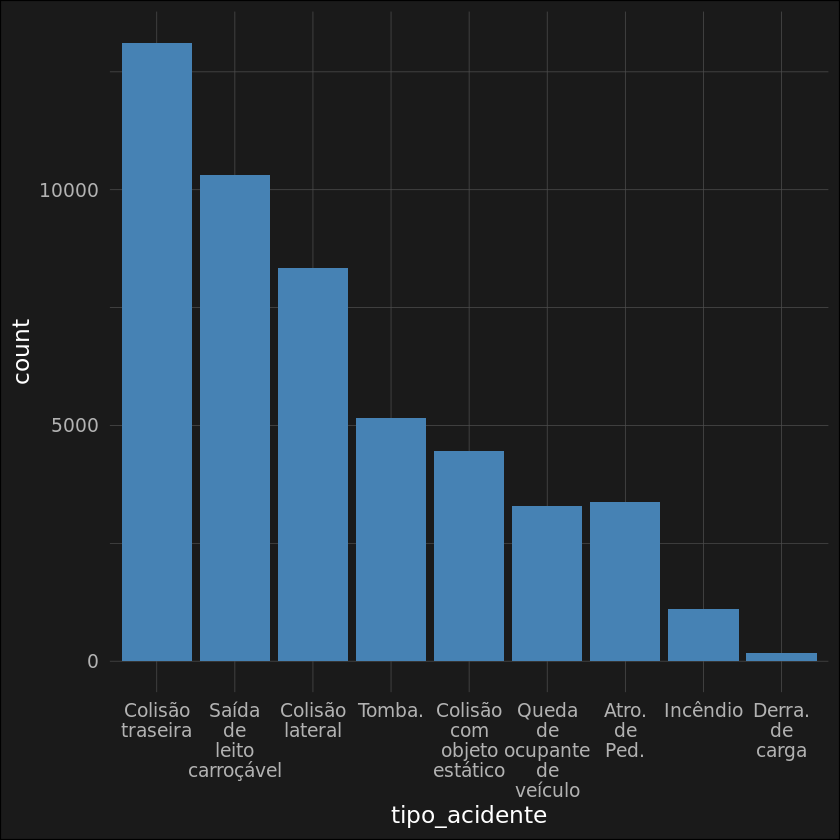

In [3]:
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

# ggplot(df.util, aes(tipo_acidente)) +
#   geom_bar(fill = "#0073C2FF") +
#   theme(legend.direction="vertical")

# customize categorical x axis
ggplot(df.util, aes(tipo_acidente)) +
  geom_bar(fill = "steelblue") +
  scale_x_discrete(limits = c("Colisão traseira", "Saída de leito carroçável", "Colisão lateral", "Tombamento","Colisão com objeto estático", 
                               "Queda de ocupante de veículo","Atropelamento de Pedestre", "Incêndio", "Derramamento de carga" ),
                   labels = c("Colisão\ntraseira", "Saída\nde\nleito\ncarroçável", "Colisão\nlateral", "Tomba.",
                              "Colisão\ncom\nobjeto\nestático",  
                              "Queda\nde\nocupante\nde\nveículo","Atro.\nde\nPed.", "Incêndio", "Derra.\nde\ncarga" )) + dark





In [16]:
# df.mini <- df.util[(df.util$municipio == "UBERABA" |
#                    df.util$municipio == "UBERLANDIA"
#                    ),]

df.mini <- df.util

# df.mini <- df.mini[(df.mini$tipo_acidente == "Colisão traseira" | 
#                     df.mini$tipo_acidente == "Saída de leito carroçável" |
#                     df.mini$tipo_acidente == "Colisão com objeto estático" |
#                     df.mini$tipo_acidente == "Tombamento" | 
#                     df.mini$tipo_acidente == "Colisão lateral" |
#                     df.mini$causa_acidente == "Incêndio" |
#                     df.mini$tipo_acidente == "Queda de ocupante de veículo" |
#                     df.mini$tipo_acidente == "Derramamento de carga"
#                    ),]

 df.mini <- df.mini[(
                     df.mini$tipo_acidente == "Incêndio" |
                     df.mini$tipo_acidente == "Derramamento de carga" |
                     df.mini$tipo_acidente == "Derramamento de carga" |
                     df.mini$tipo_acidente == "Atropelamento de Pedestre" |
                     df.mini$tipo_acidente == "Colisão frontal" |
                     df.mini$tipo_acidente == "Queda de ocupante de veículo"
                    ),]


# df.mini <- df.mini[(df.mini$causa_acidente == "Velocidade Incompatível" | 
#                     df.mini$causa_acidente == "Defeito Mecânico no Veículo" |
#                     df.mini$causa_acidente == "Condutor Dormindo" |
#                     df.mini$causa_acidente == "Ingestão de Álcool" | 
#                     df.mini$causa_acidente == "Não guardar distância de segurança" 
#                    ),]

df.mini <- na.omit(df.mini) ## retirar possiveis valores nulos

df.test = df.mini[5:7]

df.semana = df.mini[c(2,5:7)]

# str(df.mini)
# summary(df.mini)

In [17]:
# df.mca = MCA(df.mini,graph=FALSE,quali.sup=c(1:5,8:12))

# df.mca2 = MCA(df.mini,graph=FALSE,quali.sup = c(1:4,6,8:12))

df.mca.clean = MCA(df.test,graph=FALSE,quali.sup = 1)

## Teste com mistura de causas e tipos de acidentes

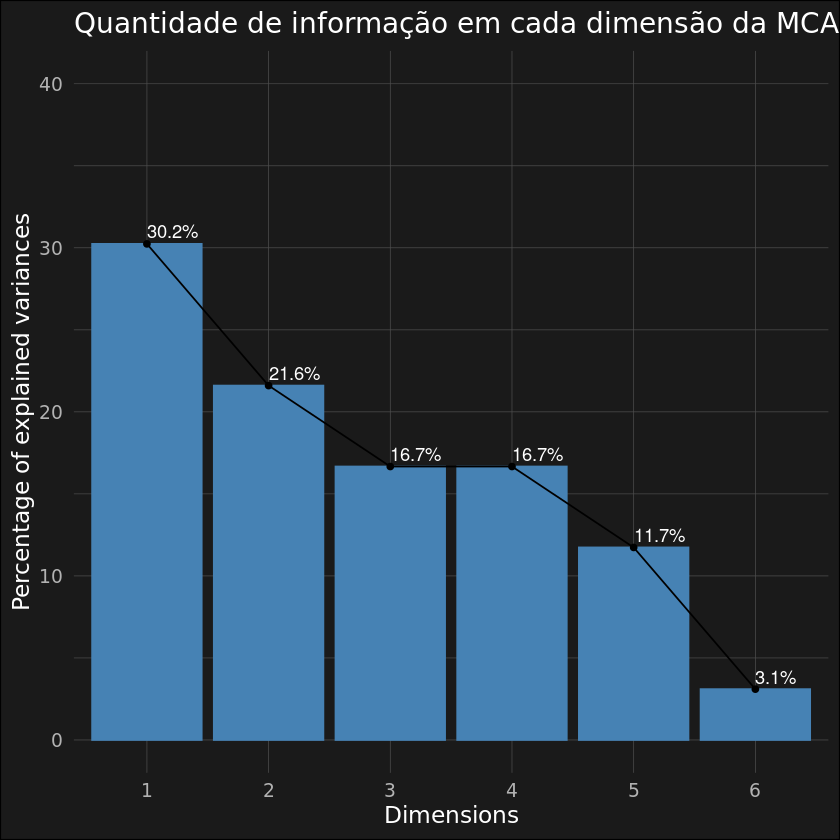

In [6]:
# eig.val <- get_eigenvalue(df.mca2)

fviz_eig(df.mca.clean, addlabels = TRUE, ylim = c(0, 40)) + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14) + labs(title = "Quantidade de informação em cada dimensão da MCA") + dark

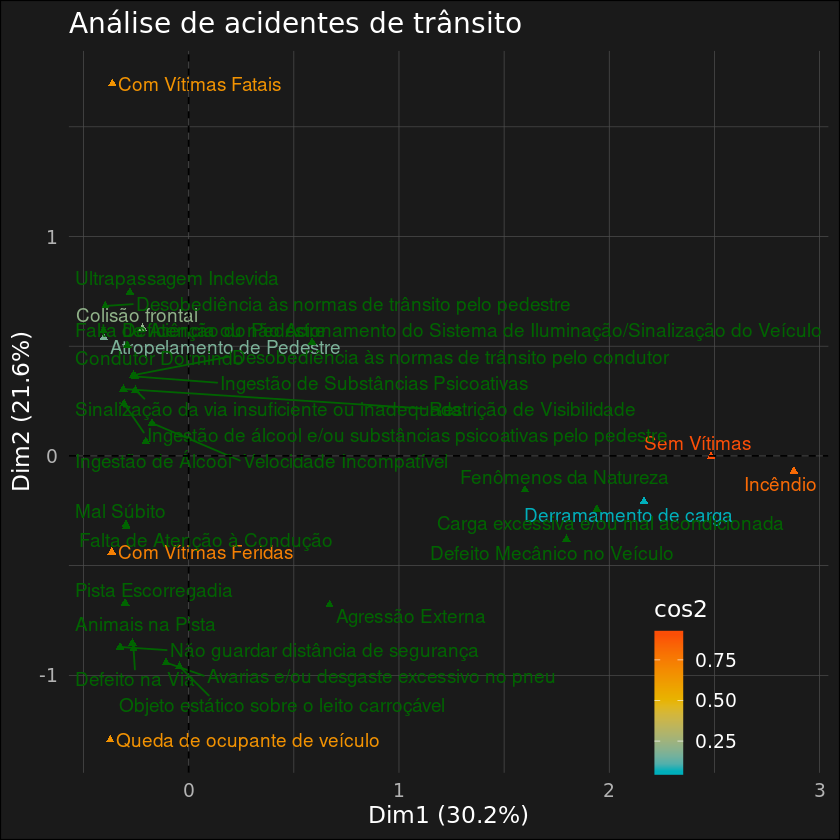

In [31]:
fviz_mca_var(df.mca.clean,axes=c(1,2), repel = TRUE,col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),) + labs(title = "Análise de acidentes de trânsito MCA")  + dark + theme(legend.position = c(0.825, 0.12))


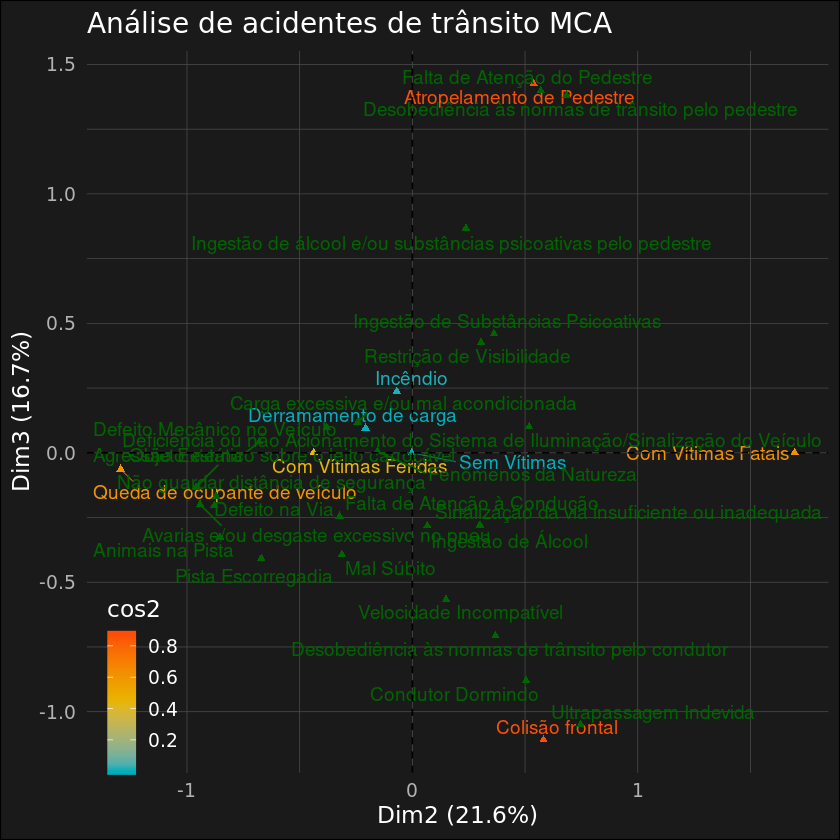

In [34]:
fviz_mca_var(df.mca.clean,axes=c(2,3), repel = TRUE,col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),) + labs(title = "Análise de acidentes de trânsito MCA")  + dark + theme(legend.position = c(0.075, 0.12))

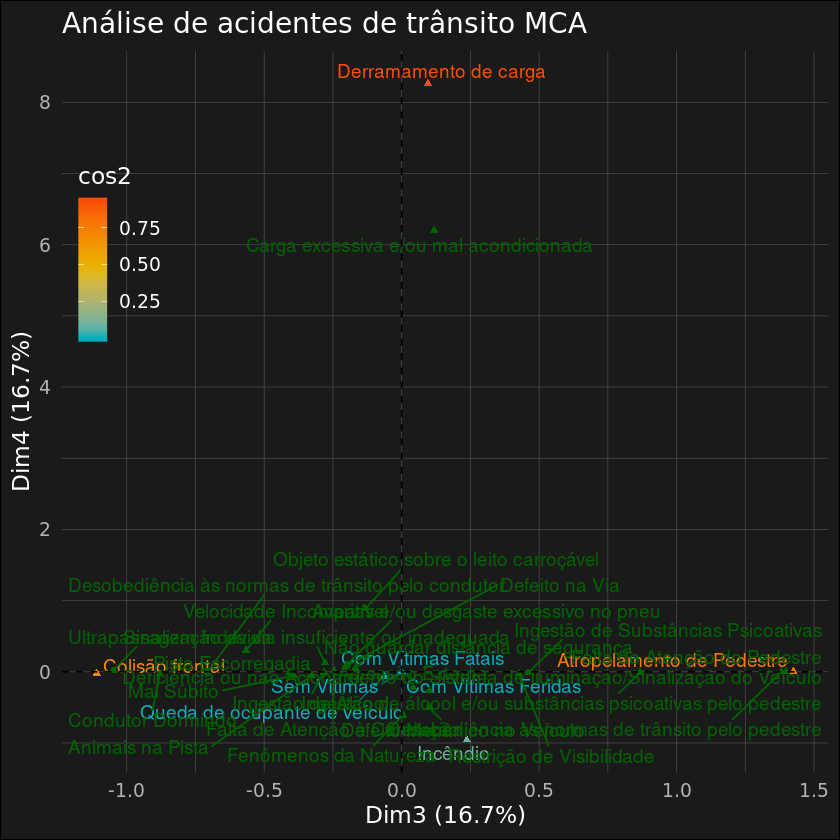

In [36]:
fviz_mca_var(df.mca.clean,axes=c(3,4), repel = TRUE,col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),) + labs(title = "Análise de acidentes de trânsito MCA")  + dark + theme(legend.position = c(0.075, 0.72))

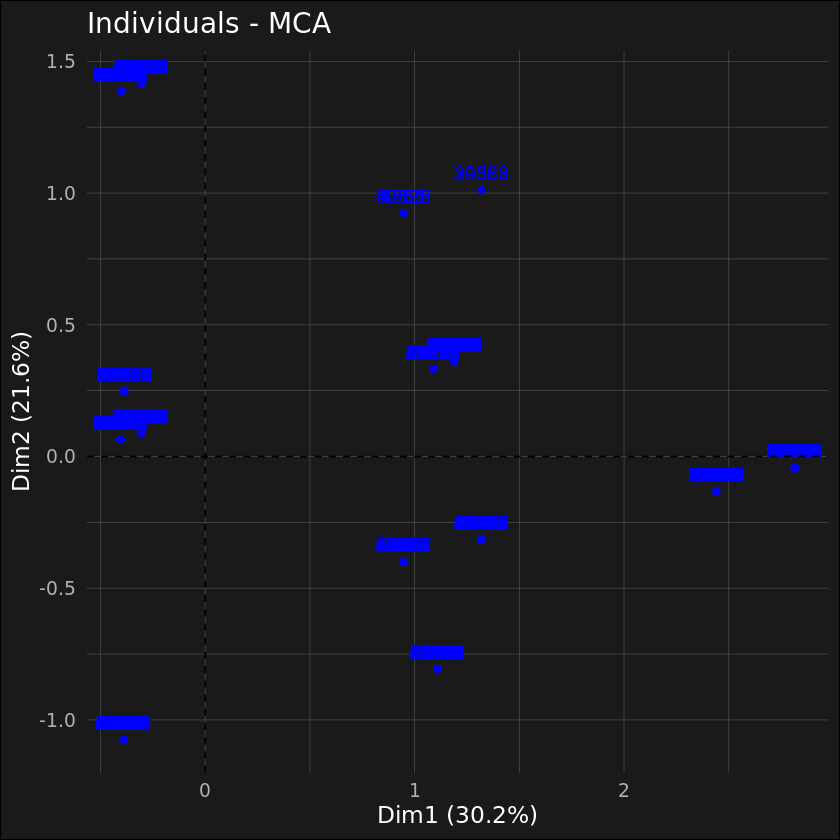

In [8]:
fviz_mca_ind(df.mca.clean,axes=c(1,2), col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))  + 
dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14)  + dark

In [9]:
res.hcpc <- HCPC(df.mca.clean, graph = FALSE)

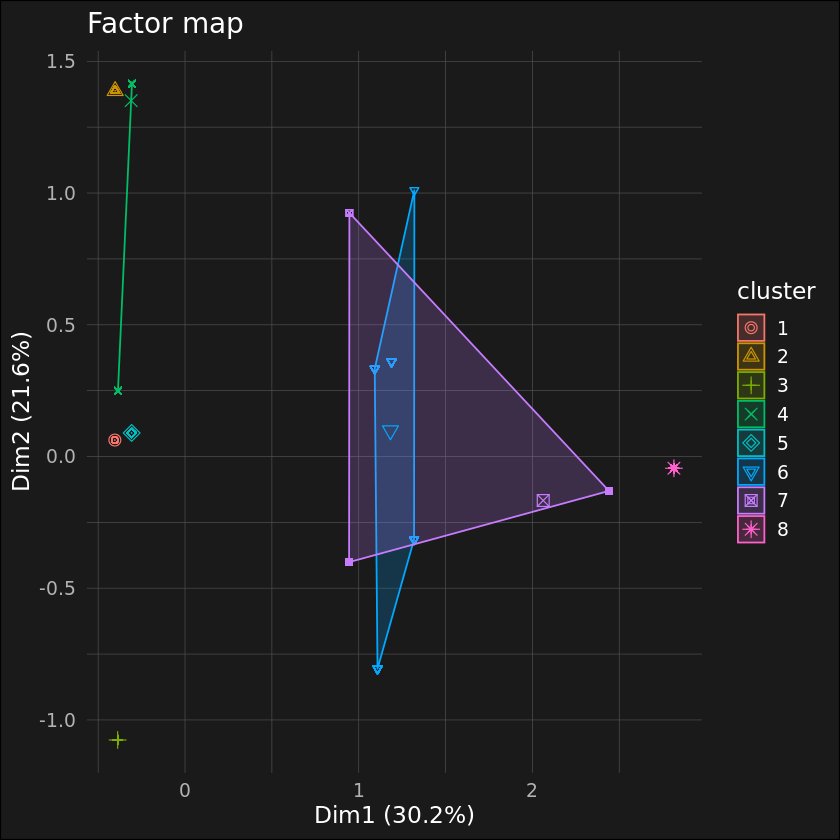

In [10]:
fviz_cluster(res.hcpc, geom = "point", main = "Factor map") + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14)  + dark

## Realizando a MCA com ambos os dados de causa e de tipo de acidentes, visualizacao ruim não muito bons

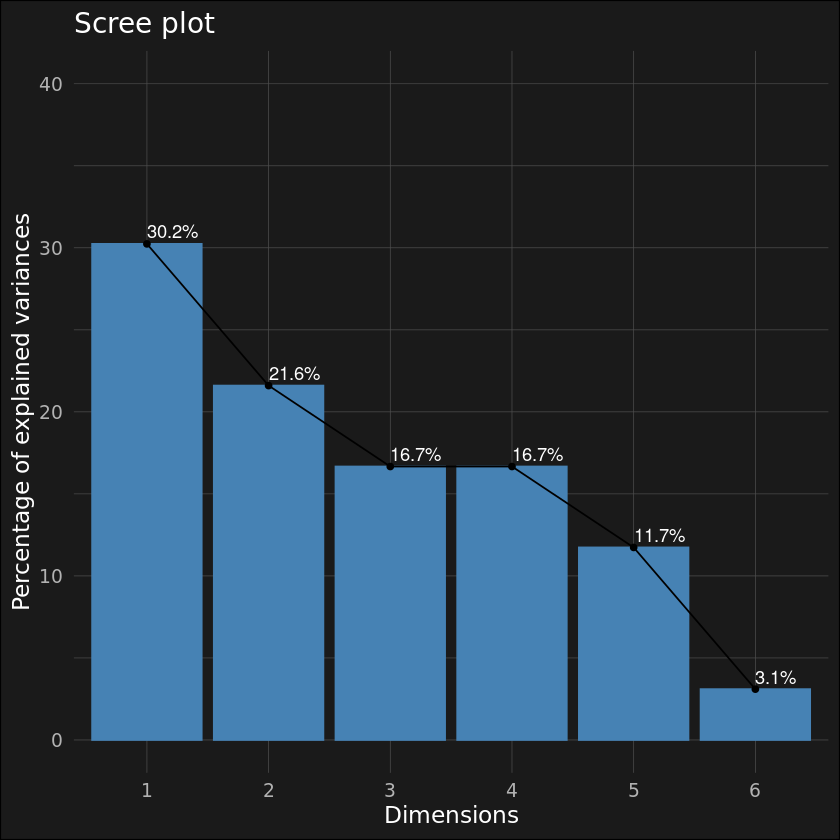

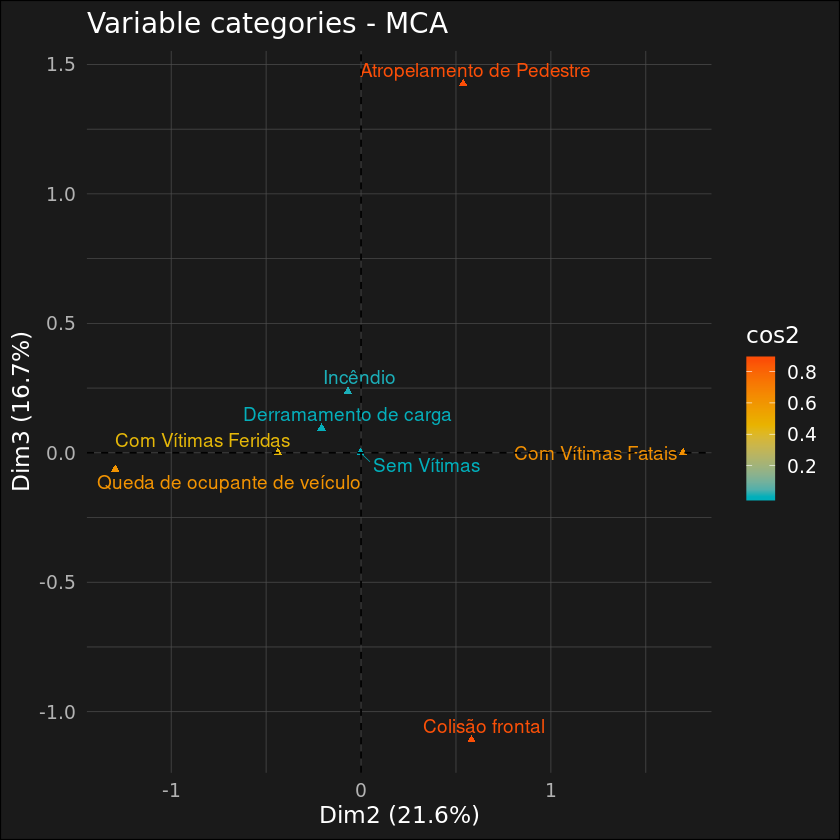

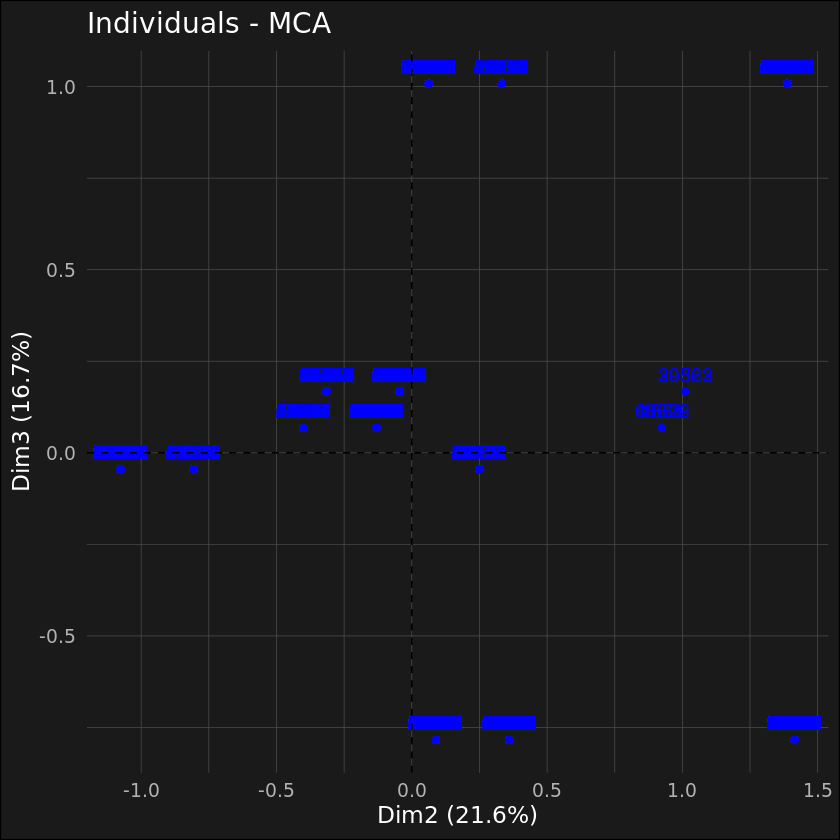

In [11]:
df.mca.clean = MCA(df.test,graph=FALSE,quali.sup=1)

fviz_eig(df.mca.clean, addlabels = TRUE, ylim = c(0, 40)) + dark

fviz_mca_var(df.mca.clean,axes=c(2,3),repel = TRUE, invisible="quali.sup",col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),)  + dark

fviz_mca_ind(df.mca.clean,axes=c(2,3), col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")) + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14)  + dark



## Analisando a correlacao com os dias de semana

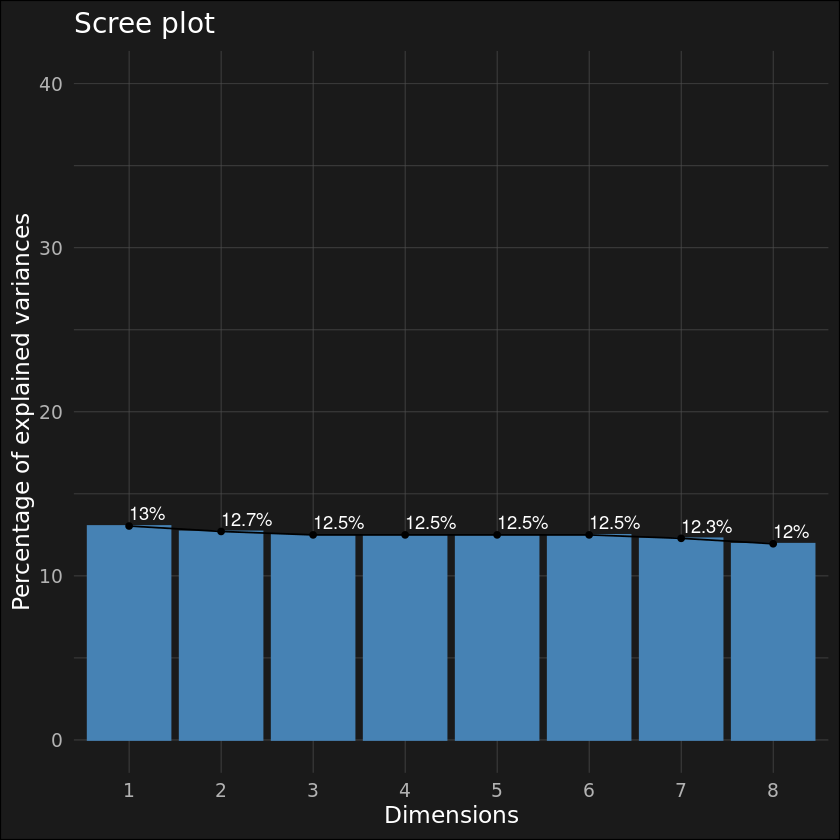

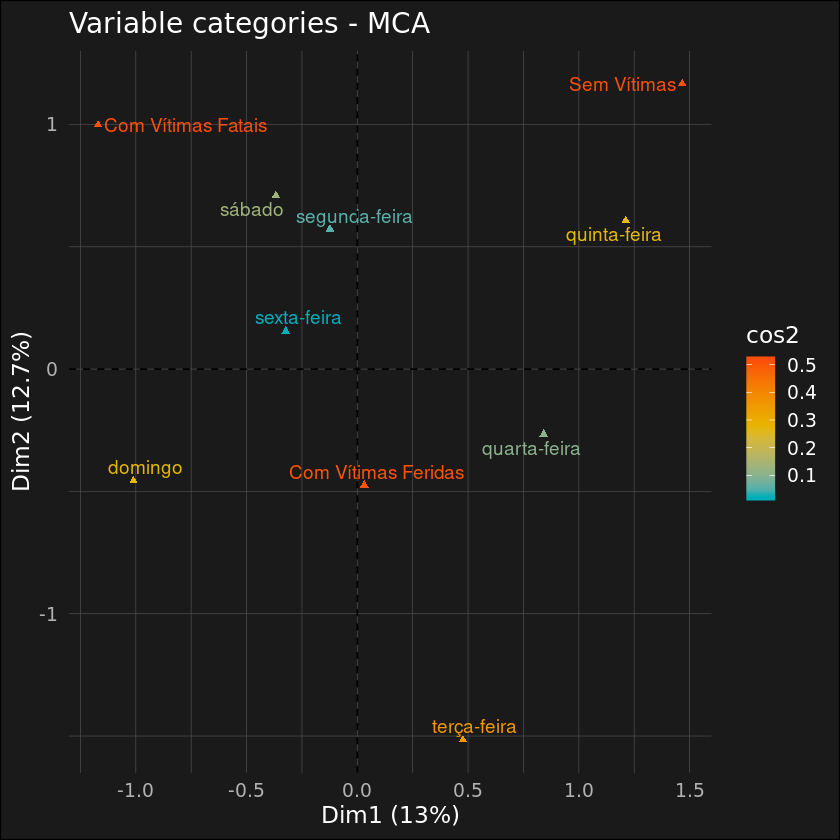

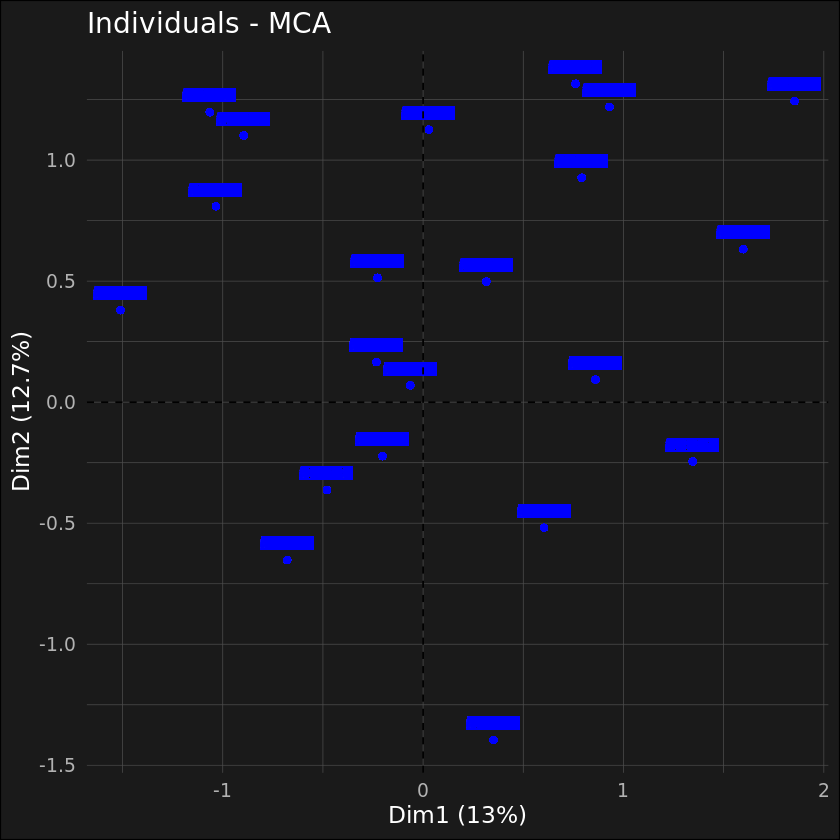

In [12]:
df.mca.clean = MCA(df.semana,graph=FALSE,quali.sup=c(2,3))

fviz_eig(df.mca.clean, addlabels = TRUE, ylim = c(0, 40)) + dark

fviz_mca_var(df.mca.clean,axes=c(1,2),repel = TRUE, invisible="quali.sup",col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),)  + dark

fviz_mca_ind(df.mca.clean,axes=c(1,2), col.var = "cos2",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")) + dark_theme_gray(base_family = "Fira Sans Condensed Light", base_size = 14)  + dark

